# Solving normal equations for linear least-squares

This notebook shows how to set up and solve the normal equations for linear least-squares problems, i.e., any parameter fitting problem where the output $y$ is related to the inputs $x$ and parameters $\boldsymbol{\beta}$ by

$$ y = f(x; \boldsymbol{\beta}) = \sum_{j=0}^{p-1} \beta_j g_j(x) $$

where there are $p$ parameters in the vector $\boldsymbol{\beta}$ and $p$ basis functions $g_j(x)$. The basis functions are assumed to be continuous.


## Some examples of linear models

Examples of linear models are

- A straight-line model $$ y = \beta_0 + \beta_1 x $$ where $g_0(x) = 1$ and $g_1(x) = x$.
- A power-law model $$ y = \beta_0 x^n $$ where $g_0(x) = x^n$
- A sine-wave model $$ y = \beta_0 \sin(x) + \beta_1 \sin(1.1 x) + \beta_2(1.2 x)$$ where $g_0(x) = \sin(x)$, $g_1(x) = \sin(1.1 x)$, and $g_2(x) = \sin(1.2 x)$.

Models like $f(x) = C e^{ax}$, while appearing nonlinear in this form, can be transformed to be linear using linearizing transformations.

## Truly nonlinear models

These are models that cannot be written in the form above, even after linearizing the model. 

However, one can still minimize the sum of least-squares, so it's possble to use least-squares for nonlinear models. Many of the solutions and analytic properties of linear least-squares solutions do not carry over to nonlinear models. An example of a nonlinear model would be

A sine-wave model with parameters inside the sine function $$ y = \sin(\beta_0 x) + \sin(\beta_1 x) + \sin(\beta_2 x) $$

There is no linearizing transformation similar to what we've studied that can change this to a straight line model.


# Normal equations

Given a set of data points $(x_i,y_i)$ for $i=1,\ldots,m$ and a model that depends on $p$ parameters $\boldsymbol{\beta}$:

$$ f(x_i; \boldsymbol{\beta}) $$

One can derive normal equations by taking the partial derivative of the sum of squared residuals, which we call $S$ following the book (this sum is also often referred to as $\chi^2$ in statistics):

$$ S = \sum_{i=1}^m (y_i - f(x_i; \boldsymbol{\beta}) $$

with respect to each of the parameters $\beta_j$ where $j=0,1,\ldots,p-1$. To optimize the sum of least-squares (we want to find the minimum value), we set all the partial derivatives equal to zero. This means we have $p$ simultaneous equations

$$ \frac{\partial S}{\partial \beta_j} = 0 $$

If these equations can be solved for the $p$ parameters, they become the normal equations. This system can also be solved numerically. 

These equations can be solved for linear problems, which for nonlinear problems they must be approached numerically. Even for linear problems, sometimes it is easier to just do it numerically.

# Example with $ax+b$

Let's start with the straight-line model

$$ f(x; a,b) = ax+b $$

where the vector of parameters is $\{a,b\}$. In class we derived the normal equations

$$ a = \frac{m\sum x_i y_i - \sum x_i \sum y_i}{m\sum x_i^2 - \left( \sum x_i \right)^2} $$

and 

$$ b = \frac{m\sum x_i^2 \sum y_i - \sum x_i y_i \sum x_i}{m\sum x_i^2 - \left( \sum x_i \right)^2} $$

where all sums range from $i=1$ to $m$

Consider some noisy example data generated randomly from the line $2x+5$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

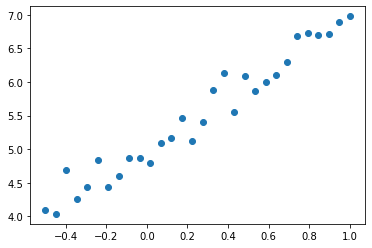

In [2]:
np.random.seed(5)
a1_true = 2
b1_true = 5
n1 = 30
x1 = np.linspace(-0.5,1,num=n1)
y1 = [a1_true*x + b1_true + 0.2*np.random.normal() for x in x1]
plt.plot(x1, y1, 'o');

## Two ways of calculating sums (pick one, do not blindly copy)

Now let's set up and use the normal equations. In terms of our variables above, the array `x1` contains the $x_i$'s, `y1` contains the $y_i$'s and $m=30$ which is stored in `n1`. We need to set up several sums to calculate the normal equation values.

The first and most straightforward way to calculate all the needed sums is using `for` loops:

In [3]:
sum_x_i = 0.0 # initialize to zero
for i in range(0,n1): # this will sum over 1 to m
    sum_x_i += x1[i] # the += syntax means to add onto the value already in sum_x_i
print('Sum on i=1 to m of x_i =', sum_x_i)

sum_y_i = 0.0 # initialize to zero
for i in range(0,n1):
    sum_y_i += y1[i]
print('Sum on i=1 to m of y_i =', sum_y_i)

sum_x_i_y_i = 0.0
for i in range(0,n1):
    sum_x_i_y_i += x1[i]*y1[i]
print('Sum on i=1 to m of x_i y_i =', sum_x_i_y_i)  

sum_x_i_2 = 0.0
for i in range(0,n1):
    sum_x_i_2 += x1[i]**2.0
print('Sum on i=1 to m of x_i**2.0 =', sum_x_i_2)  

Sum on i=1 to m of x_i = 7.500000000000001
Sum on i=1 to m of y_i = 164.8265240405435
Sum on i=1 to m of x_i y_i = 52.90354585504662
Sum on i=1 to m of x_i**2.0 = 7.887931034482759


Another way of doing this is using built-in numpy functions. The `np.sum` function computes element-wise sums over arrays. `np.dot` computes the dot product (element-wise product) between arrays.

Here is how you can use the numpy functions to do the same thing as above

In [4]:
sum_x_i_np = np.sum(x1)
print('Numpy test: Sum on i=1 to m of x_i =', sum_x_i_np)
sum_y_i_np = np.sum(y1)
print('Numpy test: Sum on i=1 to m of y_i =', sum_y_i_np)
sum_x_i_y_i_np = np.dot(x1,y1)
print('Numpy test: Sum on i=1 to m of x_i y_i =', sum_x_i_y_i_np)
sum_x_i_2_np = np.dot(x1,x1)
print('Numpy test: Sum on i=1 to m of x_i**2.0 =', sum_x_i_2_np)

Numpy test: Sum on i=1 to m of x_i = 7.500000000000001
Numpy test: Sum on i=1 to m of y_i = 164.82652404054352
Numpy test: Sum on i=1 to m of x_i y_i = 52.90354585504662
Numpy test: Sum on i=1 to m of x_i**2.0 = 7.887931034482759


See how they are the same?

PLEASE do not blindly copy both of these when doing your next lab. Use one way or the other but make sure you understand it. You should only calculate the sums once and you don't need these checking statements.

In [5]:
a1_lsq = (n1 * sum_x_i_y_i - sum_x_i*sum_y_i)/(n1*sum_x_i_2 - sum_x_i**2.0)
print('The least-squares estimate for a is', a1_lsq)
b1_lsq = ( sum_x_i_2*sum_y_i - sum_x_i_y_i*sum_x_i)/(n1*sum_x_i_2 - sum_x_i**2.0)
print('The least-squares estimate for b is', b1_lsq)

The least-squares estimate for a is 1.9452933648883814
The least-squares estimate for b is 5.007894126796022


## Comparing to our least-squares solver function

In [6]:
from linear_fitting_functions import least_squares_optimizer_fit_linear # use * if you want to import everything

In [7]:
npred1 = 50
xpred1 = np.linspace(-0.75,1.25,num=npred1)

After 2 iterations...
The optimization was successful! Here are the values it found:
       m =     1.9453
       b =     5.0079
             x value     residual squared
             -0.5000               0.0028
             -0.4483               0.0097
             -0.3966               0.2085
             -0.3448               0.0060
             -0.2931               0.0000
             -0.2414               0.0873
             -0.1897               0.0400
             -0.1379               0.0179
             -0.0862               0.0006
             -0.0345               0.0057
              0.0172               0.0603
              0.0690               0.0020
              0.1207               0.0053
              0.1724               0.0149
              0.2241               0.1080
              0.2759               0.0176
              0.3276               0.0577
              0.3793               0.1477
              0.4310               0.0821
              0.4828           

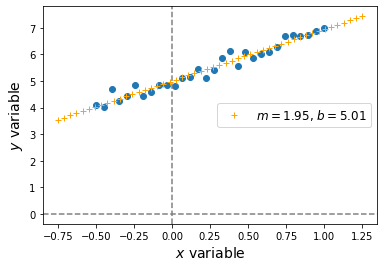

In [8]:
least_squares_optimizer_fit_linear(x1, y1, 1.94, 5, xpred1)

The numerical solver obtains almost exactly the same result. Use this to check your answers!

# Lab activity

Now do this for the quadratic model

$$ y = Ax^2 $$

Find the normal equations for this model (don't linearize it!)

Given the data below, use the normal equation to find the value of $A$

In [9]:
x2 = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
y2 = [2.875, 3.610, 3.397, 5.902, 4.826, 6.182, 8.066, 7.590, 8.692, 9.846, 12.66]

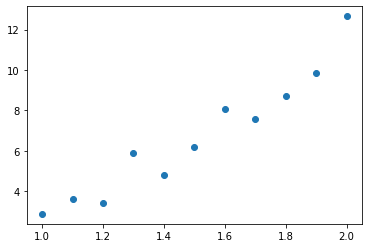

In [10]:
plt.plot(x2, y2, 'o');

The normal equation for this model is derived by taking

$$ \frac{\partial S}{\partial A} = 0 $$

where 

$$ S = \sum_{i=1}^m (y_i - Ax_i^2)^2 $$

this gives

$$ \frac{\partial S}{\partial A} = \sum_{i=1}^m 2(y_i - Ax_i^2)(-x_i^2) $$

$$ = \sum_{i=1}^m -2(y_i x_i^2 - Ax_i^4) $$

Setting it equal to zero, the -2 goes away and we have

$$ 0 = \sum_{i=1}^my_i x_i^2 - A \sum_{i=1}^m x_i^4  $$

Therefore 

$$ A = \frac{\sum_{i=1}^my_i x_i^2}{\sum_{i=1}^m x_i^4}$$

In [11]:
x2_sq = np.power(x2,2) # takes elements of x array and squares them element-wise
sum_y_i_x_i_2 = np.dot(y2, x2_sq)
x2_fourth = np.power(x2,4)
sum_x_i_4 = np.sum(x2_fourth)

In [14]:
A_approx = sum_y_i_x_i_2/sum_x_i_4
print('The value of A from the normal equation is', '{:8.4f}'.format(A_approx))

The value of A from the normal equation is   2.8616


In [15]:
n2_pred = 50
x2_pred = np.linspace(0.75,2.25,num=n2_pred)
y2_pred = np.empty(n2_pred)
for i in range(0,n2_pred):
    y2_pred[i] = A_approx * x2_pred[i]**2.0

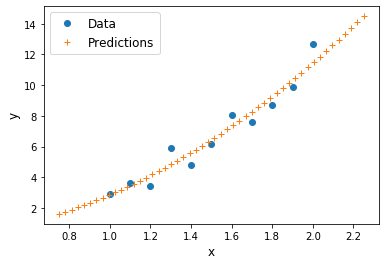

In [16]:
plt.plot(x2, y2, 'o', label='Data');
plt.plot(x2_pred, y2_pred, '+', label='Predictions');
plt.xlabel('x',fontsize=12);
plt.ylabel('y',fontsize=12);
plt.legend(fontsize=12);

Looks great! Now let's compute the sum of squared deviations $S$ for this prediction.

In [17]:
sum_sq_devs_2 = 0.0
n2 = len(x2)
for i in range(0,n2):
    sum_sq_devs_2 += (y2[i] - A_approx*x2[i]**2.0)**2.0
print('The sum of squared deviations is', '{:8.4f}'.format(sum_sq_devs_2))

The sum of squared deviations is   5.4142


Just for fun... what would the optimizer get for this problem? 

In [18]:
from scipy.optimize import minimize

In [19]:
# define a function that returns the sum of squared deviations for different values of A
def sum_sq_devs(A):
    S = 0.0
    for i in range(0,n2):
        S += (y2[i] - A*x2[i]**2.0)**2.0
    return S

In [27]:
A_guess = 2.5
res = minimize(sum_sq_devs, A_guess)
print(res.message)
print('The value of A from the optimizer search is', '{:8.4f}'.format(res.x[0]))
print('The difference between the exact and optimizer result is', '{:8.10f}'.format(abs(A_approx - res.x[0])))

Optimization terminated successfully.
The value of A from the optimizer search is   2.8616
The difference between the exact and optimizer result is 0.0000000005


Yeah it gets the same thing to within many digits of precision.